In [1]:
from sklearn.neighbors import NearestNeighbors
from smote_variants import SimplexSamplingMixin

import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0.0, 1.0],
                [1.0, 0.0],
                [2.0, 1.0],
                [3.0, 0.0],
                [2.0, 4.0],
                [5.0, 3.0],
                [1.0, 2.5]])



vertex_weights = np.array([1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5])
vertex_mask = vertex_weights == 1.0

X_min = X[vertex_mask]
X_maj = X[~vertex_mask]

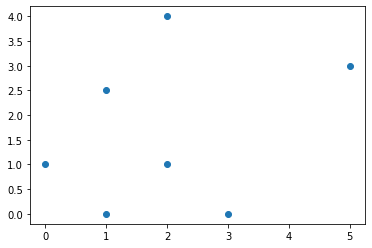

In [3]:
plt.scatter(X[:,0], X[:,1])

In [4]:
ssm = SimplexSamplingMixin(n_dim=2,
                        simplex_sampling='uniform',
                        within_simplex_sampling='deterministic')

In [6]:
X = np.array([[1, 2, 3, 4],
                [2, 3, 4, 5],
                [3, 4, 5, 6]], dtype=float)

simplices = np.array([[0, 1],
                        [0, 1]])

ssm.deterministic_samples_from_simplices(X, simplices)

[[0 1]] [1.]


array([[1.33333333, 2.33333333, 3.33333333, 4.33333333],
       [1.66666667, 2.66666667, 3.66666667, 4.66666667]])

[[2 1]] [1.]
[[3 6]] [0.5]


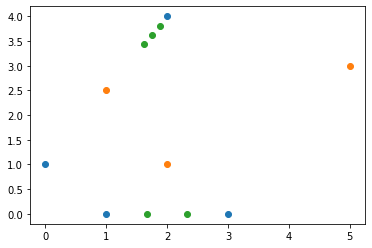

In [6]:
indices = NearestNeighbors(n_neighbors=3).fit(X).kneighbors(X_min, return_distance=False)

X_samp = ssm.sample_simplex(X=X_min, indices=indices, n_to_sample=5,
                        X_vertices=X,
                        vertex_weights=vertex_weights)


plt.scatter(X_min[:,0], X_min[:,1])
plt.scatter(X_maj[:,0], X_maj[:,1])
plt.scatter(X_samp[:,0], X_samp[:,1])
plt.show()